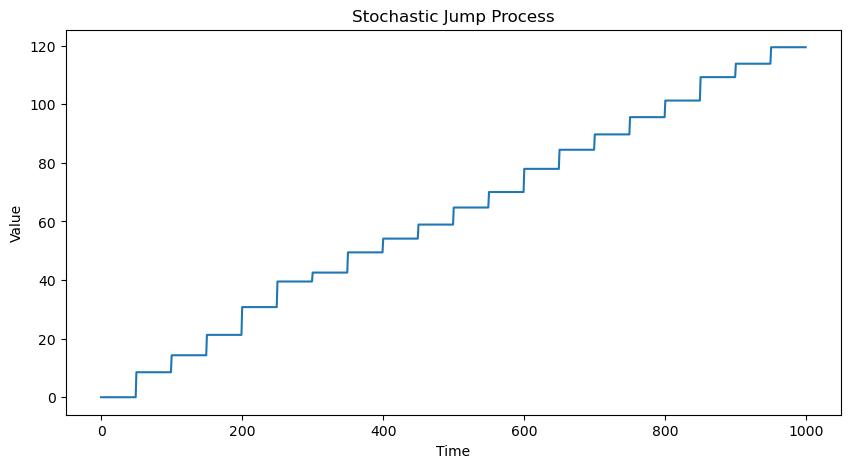

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
N = 1000  # number of time steps
jump_interval = 50  # interval between jumps
jump_magnitude = 5.0  # mean jump size
jump_variability = 2.0  # standard deviation of jump size

# Initialize time series
time_series = np.zeros(N)
time = np.arange(N)

# Generate stochastic jump process
for i in range(1, N):
    time_series[i] = time_series[i - 1]  # copy previous value
    
    # Check if it's time for a jump
    if i % jump_interval == 0:
        jump_size = np.random.normal(jump_magnitude, jump_variability)
        time_series[i] += jump_size

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, time_series)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Stochastic Jump Process')
plt.show()

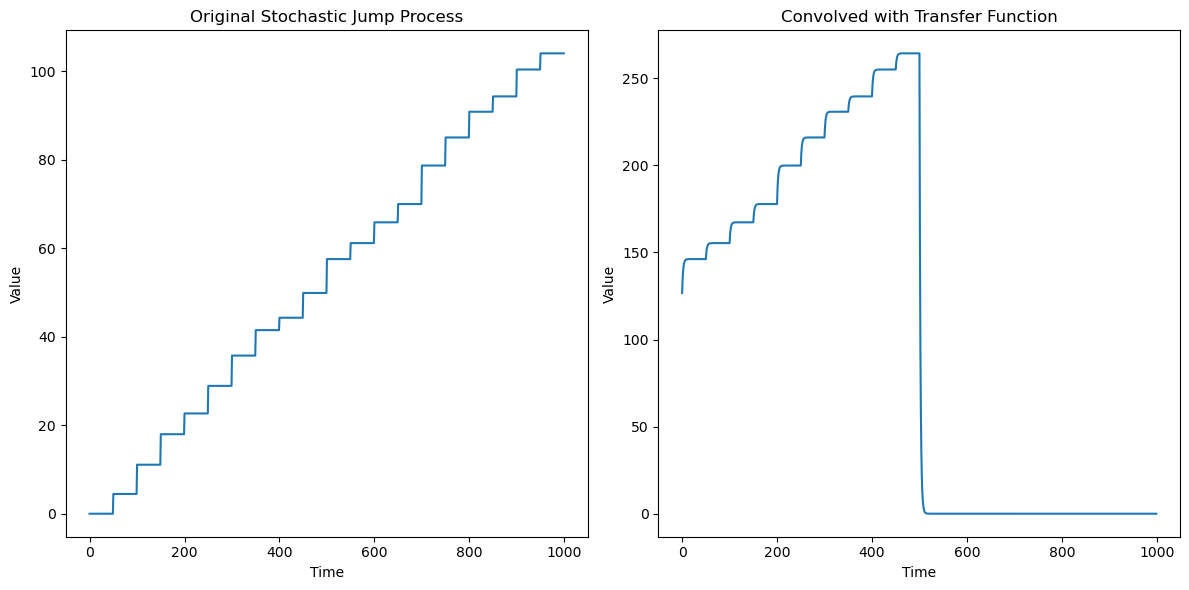

In [8]:
###This should convolve the jump process with a transfer function, but it kind of sucks for the purpose.

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def stochastic_jump_process(N=1000, jump_interval=50, jump_magnitude=5.0, jump_variability=2.0):
    """
    Generate a stochastic jump process.
    """
    # Initialize time series
    time_series = np.zeros(N)
    
    # Generate stochastic jump process
    for i in range(1, N):
        time_series[i] = time_series[i - 1]  # copy previous value
        
        # Check if it's time for a jump
        if i % jump_interval == 0:
            jump_size = np.random.normal(jump_magnitude, jump_variability)
            time_series[i] += jump_size
    
    return time_series

def transfer_function(x, decay_rate=0.5):
    """
    Simple exponential decay as a transfer function.
    """
    return np.exp(-decay_rate * x)

# Generate stochastic jump process
N = 1000
jump_process = stochastic_jump_process(N=N)

# Generate and apply transfer function
x = np.arange(N)
H = transfer_function(x)
convolved_signal = convolve(jump_process, H, mode='same')

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(jump_process)
plt.title("Original Stochastic Jump Process")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(convolved_signal)
plt.title("Convolved with Transfer Function")
plt.xlabel("Time")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


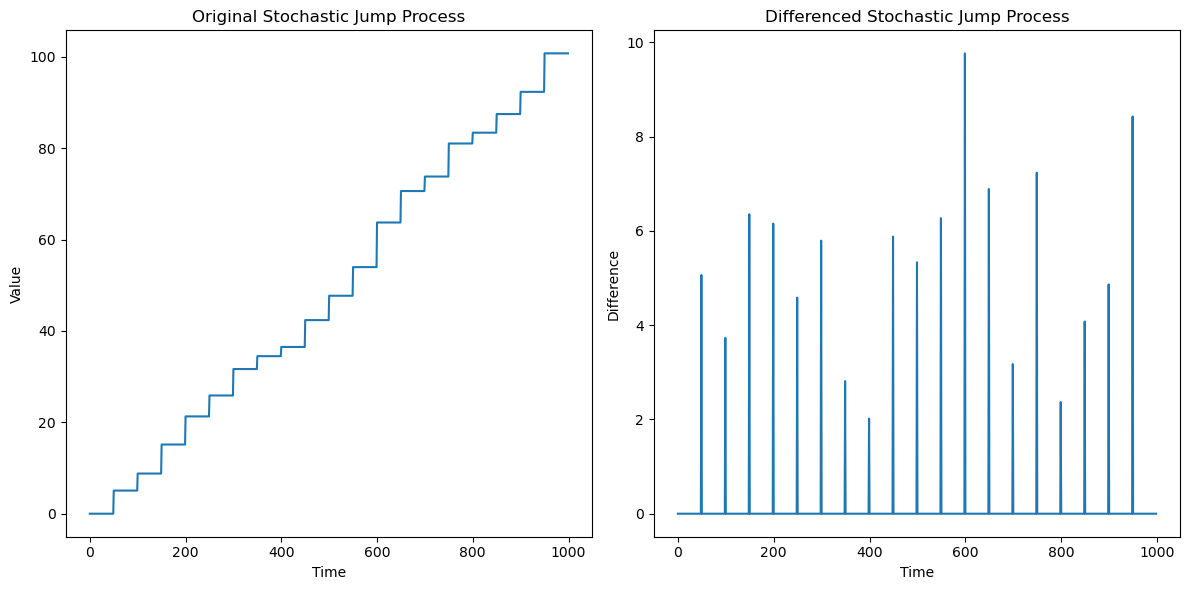

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_jump_process(N=1000, jump_interval=50, jump_magnitude=5.0, jump_variability=2.0):
    """
    Generate a stochastic jump process.
    """
    # Initialize time series
    time_series = np.zeros(N)
    
    # Generate stochastic jump process
    for i in range(1, N):
        time_series[i] = time_series[i - 1]  # copy previous value
        
        # Check if it's time for a jump
        if i % jump_interval == 0:
            jump_size = np.random.normal(jump_magnitude, jump_variability)
            time_series[i] += jump_size
    
    return time_series

# Generate stochastic jump process
N = 1000
jump_process = stochastic_jump_process(N=N)

# Differencing the jump process
differenced_jump_process = np.diff(jump_process)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(jump_process)
plt.title("Original Stochastic Jump Process")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(differenced_jump_process)
plt.title("Differenced Stochastic Jump Process")
plt.xlabel("Time")
plt.ylabel("Difference")

plt.tight_layout()
plt.show()


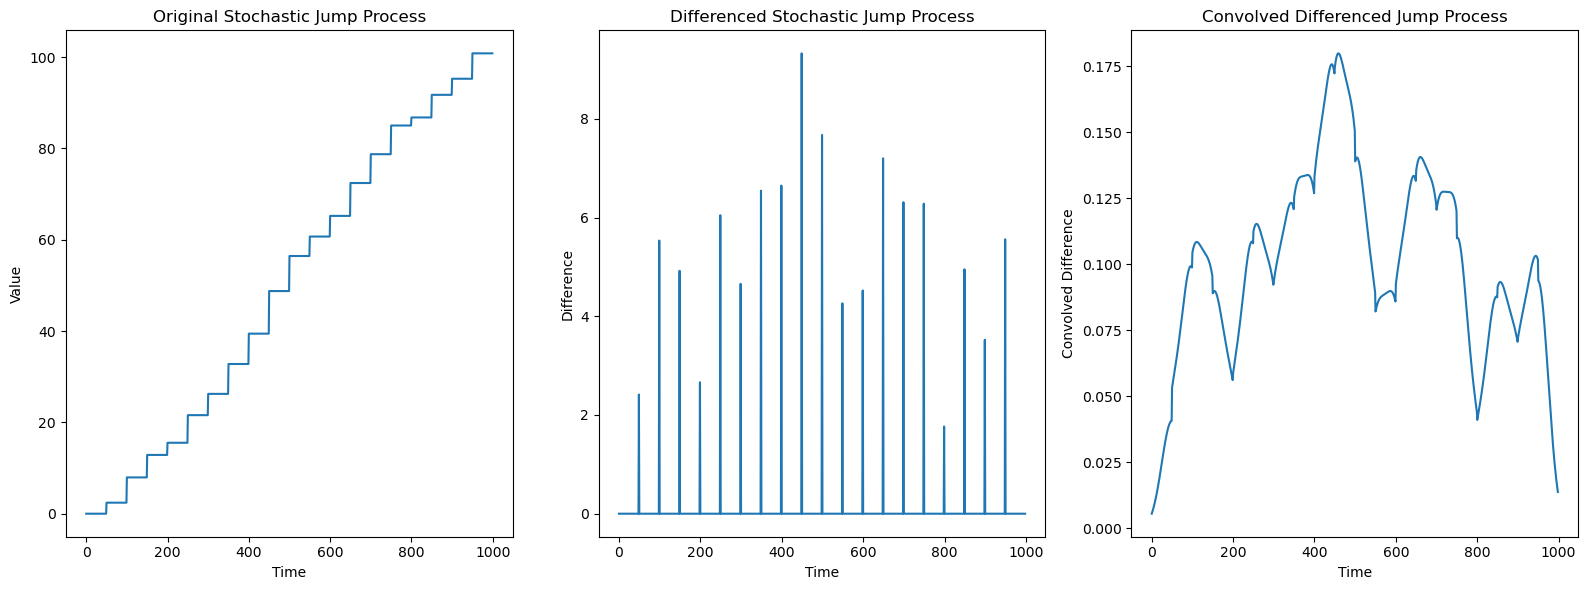

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def stochastic_jump_process(N=1000, jump_interval=50, jump_magnitude=5.0, jump_variability=2.0):
    """
    Generate a stochastic jump process.
    """
    time_series = np.zeros(N)
    for i in range(1, N):
        time_series[i] = time_series[i - 1]
        if i % jump_interval == 0:
            jump_size = np.random.normal(jump_magnitude, jump_variability)
            time_series[i] += jump_size
    return time_series

def gaussian_filter(size, sigma):
    """
    Generate a Gaussian filter.
    """
    x = np.linspace(-size // 2, size // 2, size)
    gaussian = np.exp(-x**2 / (2 * sigma**2))
    return gaussian / gaussian.sum()

# Generate stochastic jump process
N = 1000
jump_process = stochastic_jump_process(N=N)

# Differencing the jump process
differenced_jump_process = np.diff(jump_process)

# Generate Gaussian filter
filter_size = 100
sigma = 25
gaussian = gaussian_filter(filter_size, sigma)

# Convolve the differenced jump process with Gaussian filter
convolved_signal = convolve(differenced_jump_process, gaussian, mode='same')

# Plotting
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(jump_process)
plt.title("Original Stochastic Jump Process")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(1, 3, 2)
plt.plot(differenced_jump_process)
plt.title("Differenced Stochastic Jump Process")
plt.xlabel("Time")
plt.ylabel("Difference")

plt.subplot(1, 3, 3)
plt.plot(convolved_signal)
plt.title("Convolved Differenced Jump Process")
plt.xlabel("Time")
plt.ylabel("Convolved Difference")

plt.tight_layout()
plt.show()


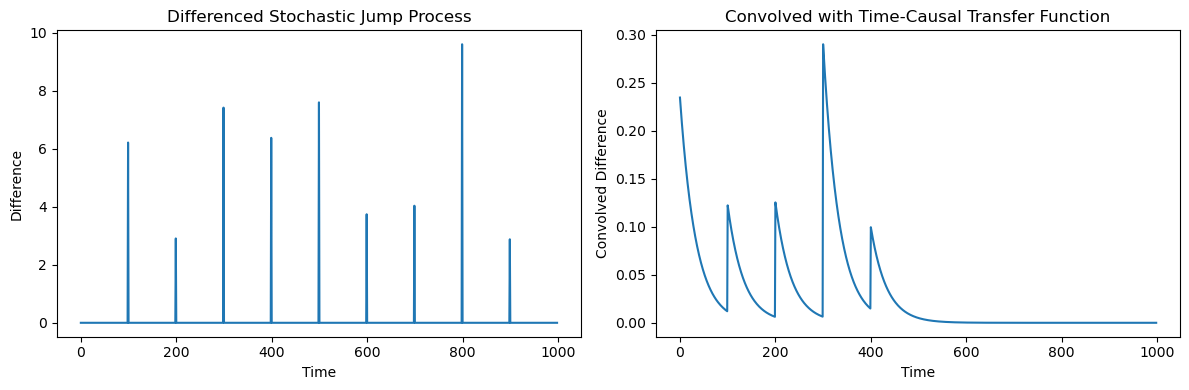

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def stochastic_jump_process(N=1000, jump_interval=100, jump_magnitude=5.0, jump_variability=2.0):
    """
    Generate a stochastic jump process.
    """
    time_series = np.zeros(N)
    for i in range(1, N):
        time_series[i] = time_series[i - 1]
        if i % jump_interval == 0:
            jump_size = np.random.normal(jump_magnitude, jump_variability)
            time_series[i] += jump_size
    return time_series

def time_causal_transfer_function(size, alpha):
    """
    Generate a time-causal transfer function (exponential decay).
    """
    h = np.exp(-alpha * np.arange(size))
    return h / h.sum()

# Generate stochastic jump process
N = 1000
jump_process = stochastic_jump_process(N=N)

# Differencing the jump process
differenced_jump_process = np.diff(jump_process)

# Generate time-causal transfer function
alpha = 0.03
transfer_fn = time_causal_transfer_function(N-1, alpha)

# Convolve the differenced jump process with the time-causal transfer function
convolved_signal = convolve(differenced_jump_process, transfer_fn, mode='same')

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(differenced_jump_process)
plt.title("Differenced Stochastic Jump Process")
plt.xlabel("Time")
plt.ylabel("Difference")

plt.subplot(1, 2, 2)
plt.plot(convolved_signal)
plt.title("Convolved with Time-Causal Transfer Function")
plt.xlabel("Time")
plt.ylabel("Convolved Difference")

plt.tight_layout()
plt.show()


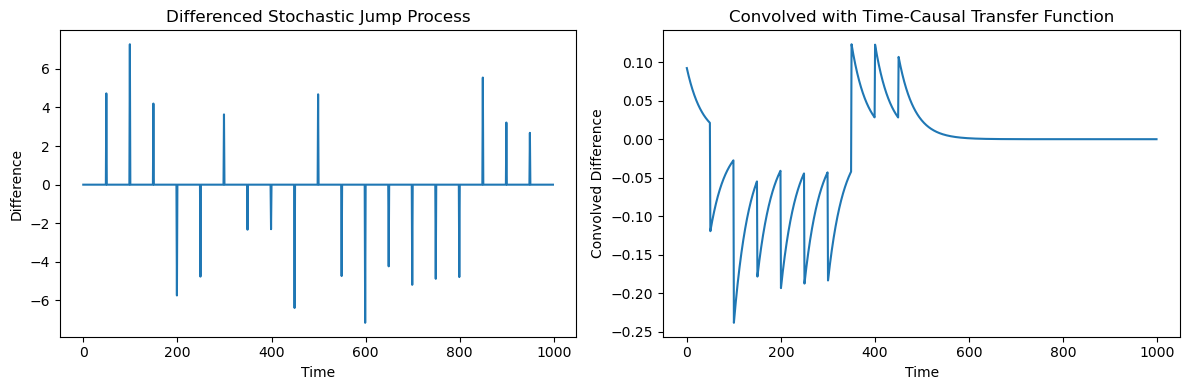

In [18]:
###This code makes for positive and negative jumps.

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def stochastic_jump_process(N=1000, jump_interval=50, jump_magnitude=5.0, jump_variability=2.0):
    """
    Generate a stochastic jump process with both positive and negative jumps.
    """
    time_series = np.zeros(N)
    for i in range(1, N):
        time_series[i] = time_series[i - 1]
        if i % jump_interval == 0:
            jump_size = np.random.normal(jump_magnitude, jump_variability)
            sign = np.sign(np.random.rand() - 0.5)
            time_series[i] += sign * jump_size
    return time_series

def time_causal_transfer_function(size, alpha):
    """
    Generate a time-causal transfer function (exponential decay).
    """
    h = np.exp(-alpha * np.arange(size))
    return h / h.sum()

# Generate stochastic jump process
N = 1000
jump_process = stochastic_jump_process(N=N)

# Differencing the jump process
differenced_jump_process = np.diff(jump_process)

# Generate time-causal transfer function
alpha = 0.03
transfer_fn = time_causal_transfer_function(N-1, alpha)

# Convolve the differenced jump process with the time-causal transfer function
convolved_signal = convolve(differenced_jump_process, transfer_fn, mode='same')

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(differenced_jump_process)
plt.title("Differenced Stochastic Jump Process")
plt.xlabel("Time")
plt.ylabel("Difference")

plt.subplot(1, 2, 2)
plt.plot(convolved_signal)
plt.title("Convolved with Time-Causal Transfer Function")
plt.xlabel("Time")
plt.ylabel("Convolved Difference")

plt.tight_layout()
plt.show()


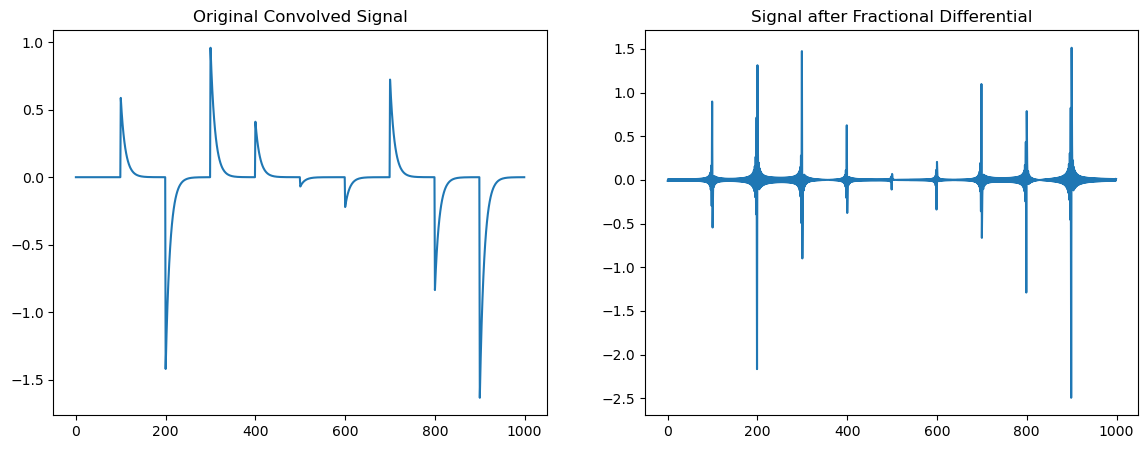

In [24]:
### Convolved with Fractional Differential of the Time-Causal Function

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

def stochastic_jump_process(N=1000, jump_interval=100, jump_magnitude=1.0, jump_variability=6.0):
    """
    Generate a stochastic jump process with both positive and negative jumps.
    """
    time_series = np.zeros(N)
    for i in range(1, N):
        time_series[i] = time_series[i - 1]
        if i % jump_interval == 0:
            jump_size = np.random.normal(jump_magnitude, jump_variability)
            sign = np.sign(np.random.rand() - 0.5)
            time_series[i] += sign * jump_size
    return time_series

def convolve_with_causal_transfer_function(signal, impulse_response):
    """
    Convolve a signal with a time-causal transfer function.
    """
    return np.convolve(signal, impulse_response, mode='full')[:len(signal)]

# Create differenced jump process
N = 1000
jump_process = stochastic_jump_process(N)
differenced_jump_process = np.diff(jump_process, prepend=0)

# Generate impulse response (time-causal transfer function)
impulse_response = np.exp(-0.1 * np.arange(N))
impulse_response /= sum(impulse_response)

# Convolve differenced jump process with time-causal transfer function
conv_result = convolve_with_causal_transfer_function(differenced_jump_process, impulse_response)

# Take Fourier Transform
conv_fft = fft(conv_result)

# Multiply by (i omega)^alpha
freqs = np.fft.fftfreq(len(conv_fft))
alpha = 1.7
conv_fft_modified = conv_fft * (1j * 2 * np.pi * freqs)**alpha

# Inverse Fourier Transform
conv_modified = np.real(ifft(conv_fft_modified))

# Plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title("Original Convolved Signal")
plt.plot(conv_result)
plt.subplot(1, 2, 2)
plt.title("Signal after Fractional Differential")
plt.plot(conv_modified)
plt.show()


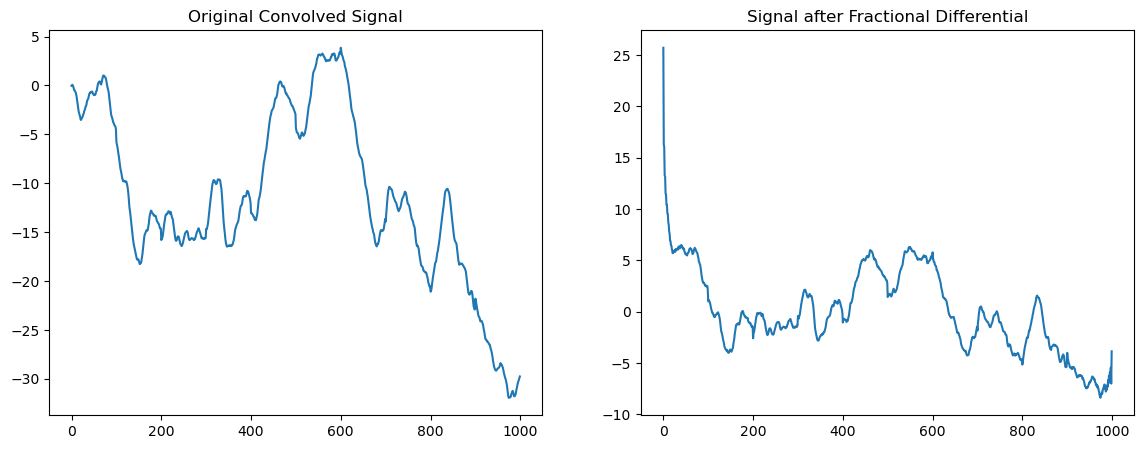

In [199]:
### add brownian motion to the differenced jump process before convolving with the fractional-diff time-causal function
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Function to generate stochastic jump process
def stochastic_jump_process(N=1000, jump_interval=100, jump_magnitude=10.0, jump_variability=2.0):
    time_series = np.zeros(N)
    for i in range(1, N):
        time_series[i] = time_series[i - 1]
        if i % jump_interval == 0:
            jump_size = np.random.normal(jump_magnitude, jump_variability)
            sign = np.sign(np.random.rand() - 0.5)
            time_series[i] += sign * jump_size
    return time_series

# Function to convolve with time-causal transfer function
def convolve_with_causal_transfer_function(signal, impulse_response):
    return np.convolve(signal, impulse_response, mode='full')[:len(signal)]

# Create stochastic jump process and difference it
N = 1000
jump_process = stochastic_jump_process(N)
differenced_jump_process = np.diff(jump_process, prepend=0)

# Add Brownian motion (Wiener process) to the differenced jump process
brownian_motion = np.cumsum(np.random.normal(0, 1, N))
differenced_jump_process_with_brownian = differenced_jump_process + brownian_motion

# Generate impulse response (time-causal transfer function)
impulse_response = np.exp(-0.1 * np.arange(N))
impulse_response /= sum(impulse_response)

# Convolve the sum of the differenced jump process and Brownian motion with the impulse response
conv_result = convolve_with_causal_transfer_function(differenced_jump_process_with_brownian, impulse_response)

# Take Fourier Transform
conv_fft = fft(conv_result)

# Multiply by (i omega)^alpha
freqs = np.fft.fftfreq(len(conv_fft))
alpha = 0.2
conv_fft_modified = conv_fft * (1j * 2 * np.pi * freqs)**alpha

# Inverse Fourier Transform
conv_modified = np.real(ifft(conv_fft_modified))

# Plot the results
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title("Original Convolved Signal")
plt.plot(conv_result)
plt.subplot(1, 2, 2)
plt.title("Signal after Fractional Differential")
plt.plot(conv_modified)
plt.show()


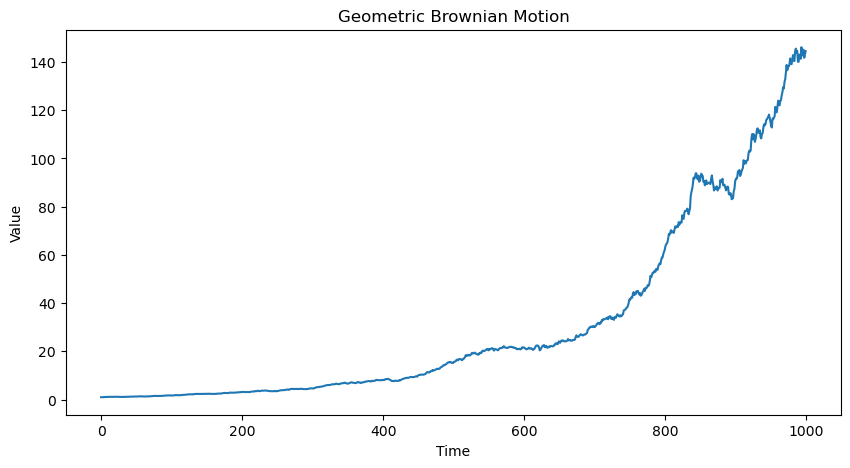

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of time steps
S0 = 1.0  # Initial value
mu = 0.06  # Drift
sigma = 0.05  # Volatility
dt = 0.1  # Time step

# Initialize array to hold GBM values
gbm = np.zeros(N)
gbm[0] = np.log(S0)  # Take the log of the initial value

# Generate GBM
for i in range(1, N):
    dWt = np.random.normal() * np.sqrt(dt)
    gbm[i] = gbm[i - 1] + (mu - 0.5 * sigma ** 2) * dt + sigma * dWt

# Convert back to original scale
gbm = np.exp(gbm)

# Plot GBM
plt.figure(figsize=(10, 5))
plt.title("Geometric Brownian Motion")
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(gbm)
plt.show()



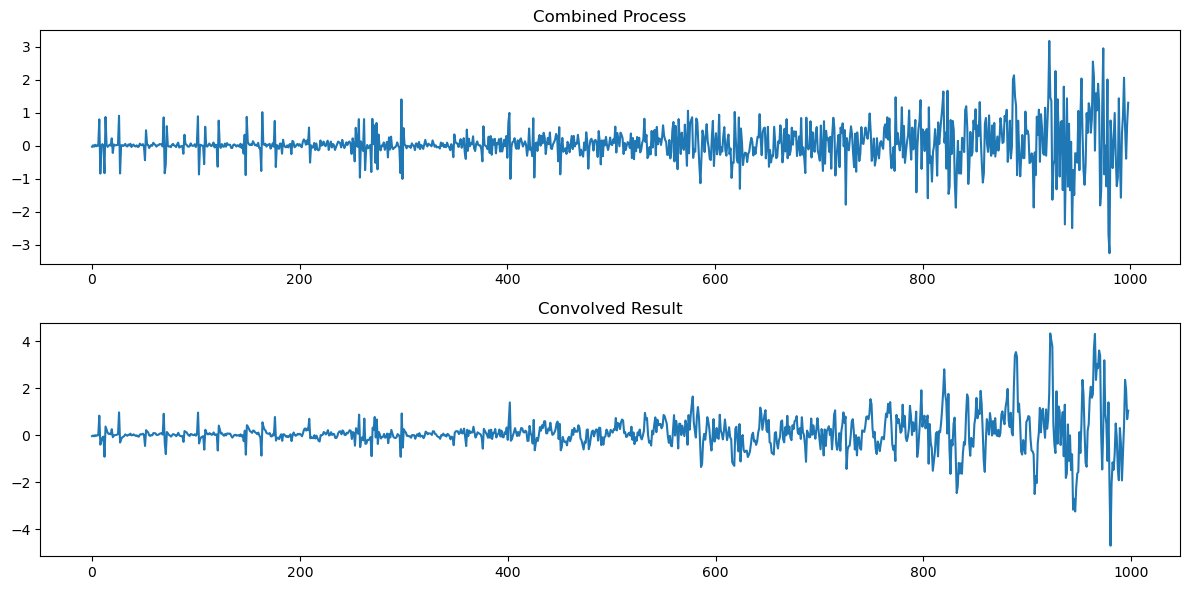

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import convolve

# Generate differenced jump process
np.random.seed(0)
n = 1000
jump_prob = 0.1
jump_amplitude = 0.9
jumps = np.random.binomial(1, jump_prob, n+1) * (np.random.rand(n+1) - 0.5) * 2 * jump_amplitude
differenced_jump = np.diff(jumps)

# Generate GBM
dt = 0.01
mu = 0.5
sigma = 0.25
S0 = 1
GBM = np.zeros(n)
GBM[0] = S0
for i in range(1, n):
    dW = np.sqrt(dt) * np.random.randn()
    GBM[i] = GBM[i - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    
# Adding GBM and differenced jump process
combined_process = differenced_jump[:-1] + np.diff(GBM)

# Time-causal exponential window function
lambda_ = 0.5
t = np.arange(0, n-2, 1)
window_func = np.exp(-lambda_ * t)
window_func[t < 0] = 0

# FFT the window, multiply by (i omega)^alpha, then IFFT
alpha = 0.01
window_fft = fft(window_func)
freqs = np.fft.fftfreq(len(window_fft), dt)
window_fft *= (1j * 2 * np.pi * freqs)**alpha
window_ifft = np.real(ifft(window_fft))

# Convolve
conv_result = convolve(combined_process, window_ifft, mode='full')[:n-2]

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Combined Process')
plt.plot(combined_process)
plt.subplot(2, 1, 2)
plt.title('Convolved Result')
plt.plot(conv_result)
plt.tight_layout()
plt.show()


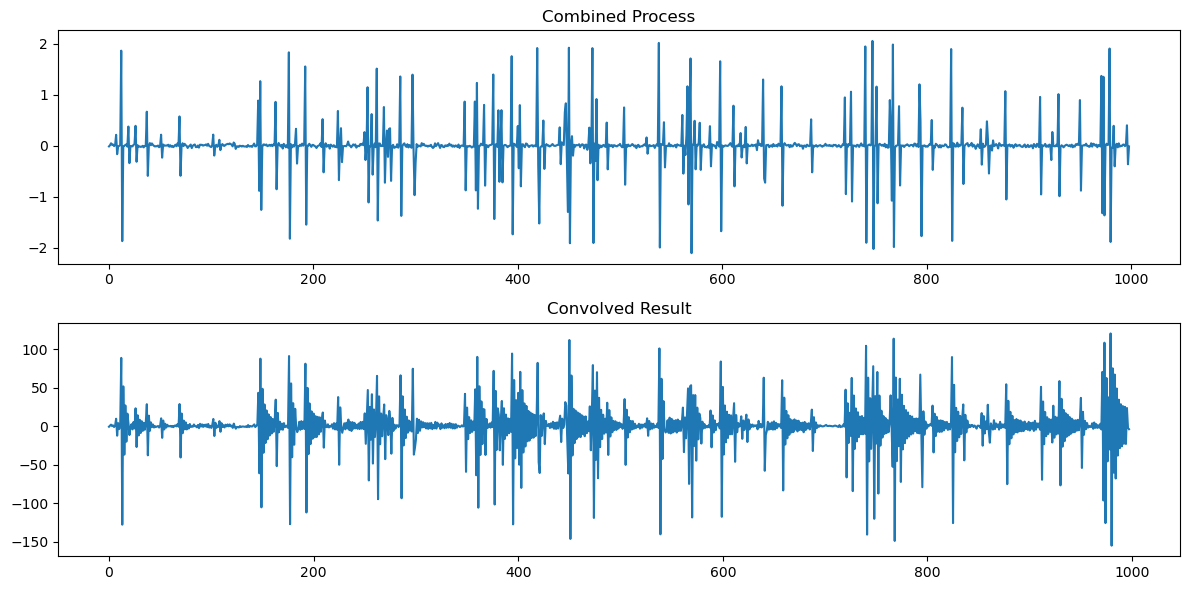

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import convolve
from scipy.stats import skewnorm

# Generate Gaussian distributed jump process with skewness
np.random.seed(0)
n = 1000
jump_prob = 0.1
jump_amplitude = 1.0
alpha_skew = 4.0  # Positive skewness
jumps = np.random.binomial(1, jump_prob, n+1) * skewnorm.rvs(alpha_skew, scale=jump_amplitude, size=n+1)
differenced_jump = np.diff(jumps)

# Generate GBM
dt = 0.01
mu = 0.1
sigma = 0.2
S0 = 1
GBM = np.zeros(n)
GBM[0] = S0
for i in range(1, n):
    dW = np.sqrt(dt) * np.random.randn()
    GBM[i] = GBM[i - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

# Adding GBM and differenced jump process
combined_process = differenced_jump[:-1] + np.diff(GBM)

# Time-causal exponential window function
lambda_ = 0.1
t = np.arange(0, n-2, 1)
window_func = np.exp(-lambda_ * t)
window_func[t < 0] = 0

# FFT the window, multiply by (i omega)^alpha, then IFFT
alpha = 0.9
window_fft = fft(window_func)
freqs = np.fft.fftfreq(len(window_fft), dt)
window_fft *= (1j * 2 * np.pi * freqs)**alpha
window_ifft = np.real(ifft(window_fft))

# Convolve
conv_result = convolve(combined_process, window_ifft, mode='full')[:n-2]

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Combined Process')
plt.plot(combined_process)
plt.subplot(2, 1, 2)
plt.title('Convolved Result')
plt.plot(conv_result)
plt.tight_layout()
plt.show()


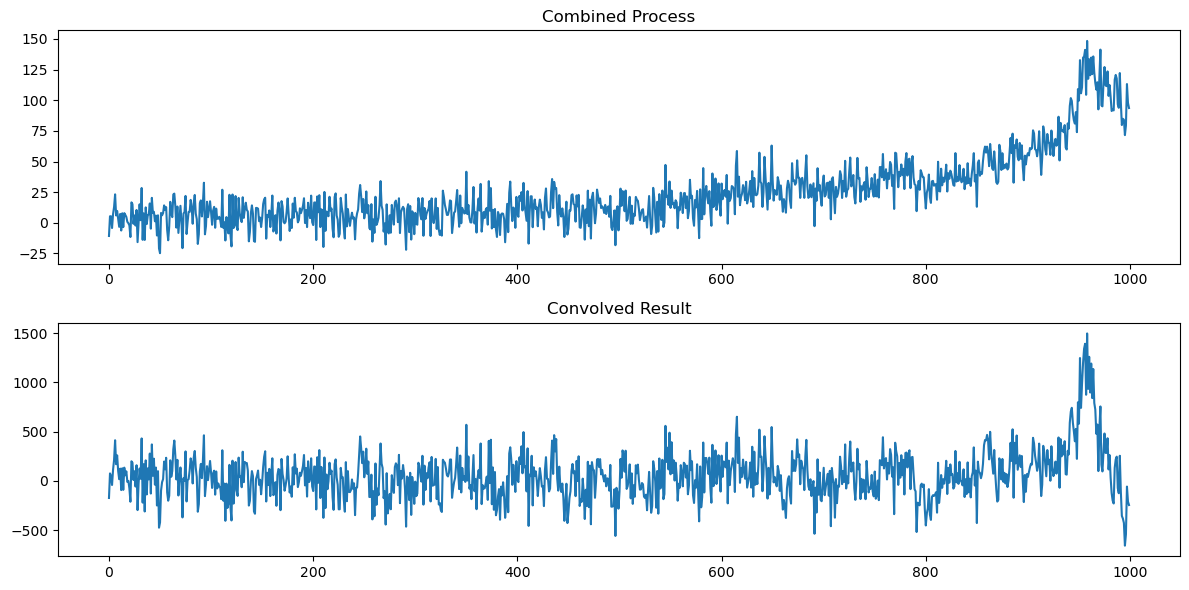

In [163]:
###the jump process here is incorrect

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import convolve
from scipy.stats import skewnorm

# Parameters
n = 1000
dt = 0.01
alpha_skew = 0.5  # Skewness for jumps
mu = 0.6  # Drift for GBM
sigma = 0.5  # Volatility for GBM
alpha = 0.6  # Fractional differentiation exponent

# Generate skewed Gaussian jumps
jump_amplitude = 12.0
jumps = skewnorm.rvs(alpha_skew, scale=jump_amplitude, size=n)

# Generate GBM
S0 = 1
GBM = np.zeros(n)
GBM[0] = S0
for i in range(1, n):
    dW = np.sqrt(dt) * np.random.randn()
    GBM[i] = GBM[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

# Combine GBM and jump process
combined_process = GBM + jumps

# Create a time-causal exponential window function
lambda_ = 0.1
t = np.arange(0, n, 1)
window_func = np.exp(-lambda_ * t)
window_func[t < 0] = 0

# FFT the window, multiply by (i omega)^alpha, then IFFT
window_fft = fft(window_func)
freqs = np.fft.fftfreq(len(window_fft), dt)
window_fft *= (1j * 2 * np.pi * freqs)**alpha
window_ifft = np.real(ifft(window_fft))

# Convolve the combined process with the IFFT of the window function
conv_result = convolve(combined_process, window_ifft, mode='full')[:n]

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Combined Process')
plt.plot(combined_process)
plt.subplot(2, 1, 2)
plt.title('Convolved Result')
plt.plot(conv_result)
plt.tight_layout()
plt.show()


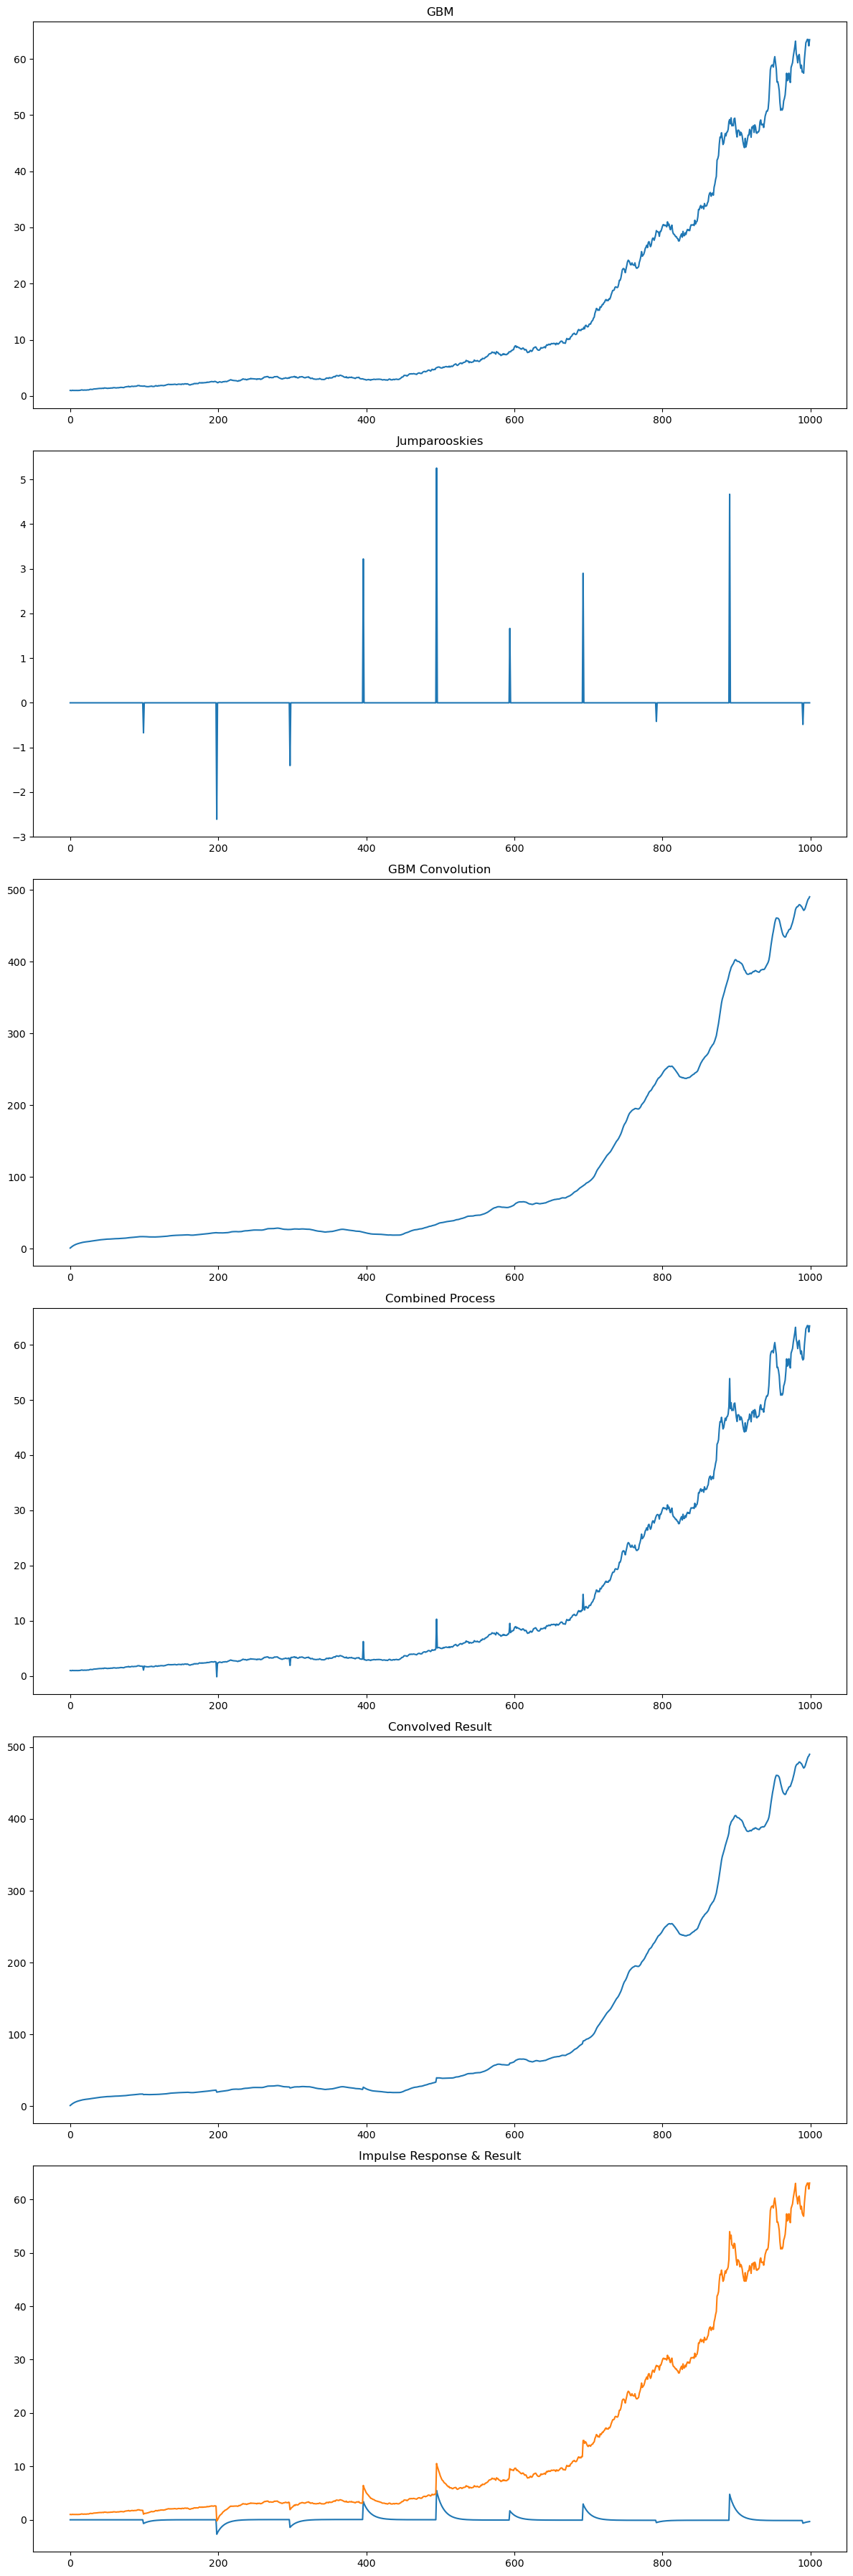

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import convolve
from scipy.stats import skewnorm

# Parameters
n = 1000
dt = 0.01
alpha_skew = 0.6  # Skewness for jumps
mu = 0.4  # Drift for GBM
sigma = 0.2  # Volatility for GBM
alpha = 0.01  # Fractional differentiation exponent
jump_interval = 99  # Interval for periodic jumps

# Initialize jump array with zeros and set jumps periodically
jump_amplitude = 2
jumps = np.zeros(n)
jumps[jump_interval::jump_interval] = skewnorm.rvs(alpha_skew, scale=jump_amplitude, size=n//jump_interval)

# Generate GBM
S0 = 1
GBM = np.zeros(n)
GBM[0] = S0
for i in range(1, n):
    dW = np.sqrt(dt) * np.random.randn()
    GBM[i] = GBM[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

# Combine GBM and jump process
combined_process = GBM + jumps

# Create a time-causal exponential window function
lambda_ = 0.1
t = np.arange(0, n, 1)
window_func = np.exp(-lambda_ * t)
window_func[t < 0] = 0

# FFT the window, multiply by (i omega)^alpha, then IFFT
window_fft = fft(window_func)
freqs = np.fft.fftfreq(len(window_fft), dt)
window_fft *= (1j * 2 * np.pi * freqs)**alpha
window_ifft = np.real(ifft(window_fft))

# Convolve the combined process with the IFFT of the window function
conv_GBM = convolve(GBM, window_ifft,mode='full')[:n]
conv_result = convolve(combined_process, window_ifft, mode='full')[:n]
impulse_response = convolve(jumps, window_ifft, mode='full')[:n]
result = GBM + impulse_response

# Plotting
plt.figure(figsize=(12, 36))
plt.subplot(6, 1, 1)
plt.title('GBM')
plt.plot(GBM)
plt.subplot(6, 1, 2)
plt.title('Jumparooskies')
plt.plot(jumps)
plt.subplot(6, 1, 3)
plt.title('GBM Convolution')
plt.plot(conv_GBM)
plt.subplot(6, 1, 4)
plt.title('Combined Process')
plt.plot(combined_process)
plt.subplot(6, 1, 5)
plt.title('Convolved Result')
plt.plot(conv_result)
plt.subplot(6, 1, 6)
plt.title('Impulse Response & Result')
plt.plot(impulse_response)
plt.plot(result)
plt.tight_layout()
